In [29]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import griddata
from matplotlib.gridspec import GridSpec
import struct
from matplotlib.patches import Circle, PathPatch


V = np.genfromtxt("Meshdata/VerticesRing8.txt")
T = np.genfromtxt("Meshdata/FacesRing8.txt")

n_v = len(V)
n_t = len(T)

#for i in range(0, n_t , 1):
#        for j in range( 0, 3 , 1):
#                k = int(T[i][j])
#                l = int(T[i][(j+1)%3])
#                plt.plot( [V[k][0],V[l][0]], [V[k][1],V[l][1]] , c='black', alpha=0.4)
#for i in range(0,n_v,1):
#    plt.scatter(V[i][0],V[i][1], color='r', marker='o')
#plt.show()



Sol = np.genfromtxt("Solutions/PoissonHarmSolutionRing8.txt")

In [30]:
def InterpolationPlot( Vertices , Values, Title, Triangulation):
    #define grid
    xi = np.linspace(0.,1.,1001)
    yi = np.linspace(0.,1.,1001)
    # grid the data
    zi = griddata( Vertices , Values, (xi[None,:], yi[:,None]), method='cubic')
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS1 = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
    CS2 = plt.contourf(xi,yi,zi,15,cmap='plasma',alpha=0.5)
    plt.clabel(CS1, inline=True)
    plt.colorbar() # draw colorbar
    # plot data points.
    #plt.scatter(V[::,:1:],V[::,1::],marker='o',c='b',s=10,alpha=.5)
    #for i in range(0, len(Triangulation) , 1):
    #    for j in range( 0, 3 , 1):
    #            k = int(Triangulation[i][j])
    #            l = int(Triangulation[i][(j+1)%3])
    #            plt.plot( [V[k][0],V[l][0]], [V[k][1],V[l][1]] , c='grey',alpha=0.3)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title(Title)

constant = -1*Sol[0]

In [31]:
from scipy.optimize import curve_fit

def FuncModel(x,a,b):
    return a*x**2 + b

xdata = []
ydata = []
for i in range(0,len(V)):
    r = ((V[i][0]-0.5)**2 + (V[i][1]-0.5)**2)**0.5
    xdata.append(r)
    ydata.append(Sol[i]+constant)

popt, pcov = curve_fit( FuncModel, xdata, ydata )
print(popt)
print(pcov)
print(np.sqrt(np.diagonal(pcov)))

[ 1.00000068e+01 -4.30964505e-07]
[[ 8.21740333e-13 -9.60699887e-14]
 [-9.60699887e-14  1.51622421e-14]]
[9.06498942e-07 1.23135057e-07]


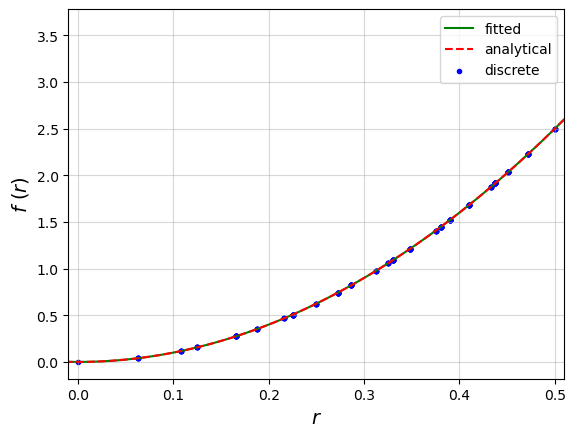

In [32]:
X = np.linspace(-0.1,0.6,100)
plt.grid(alpha=0.5)
plt.plot(X, popt[0]*X**2+popt[1], color='g',label='fitted')
plt.plot(X, 10.*X**2, color='r', linestyle='dashed',label='analytical')
plt.scatter(xdata,ydata,color='b',marker='.',label='discrete')
plt.xlabel('$r$',fontsize=14)
plt.xlim(-0.01,0.51)
plt.ylabel('$f\ (r)$',fontsize=14)
plt.legend()
plt.show()

Text(0, 0.5, 'y')

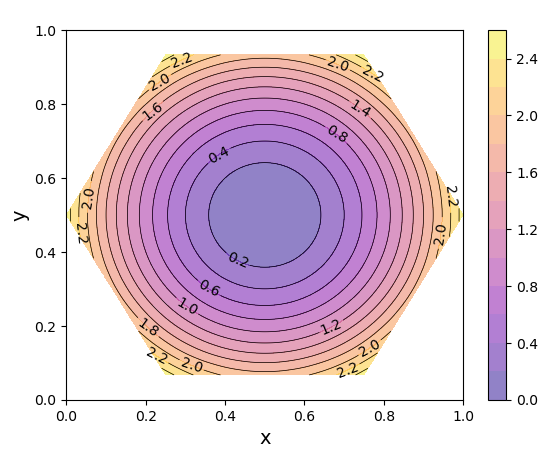

In [33]:

InterpolationPlot( V , Sol +constant, " ", T)
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)

In [34]:
def InterpolationPlot2( Vertices , Values, Title, Triangulation):
    #define grid
    xi = np.linspace(0.,1.,1001)
    yi = np.linspace(0.,1.,1001)
    # grid the data
    zi = griddata( Vertices , Values, (xi[None,:], yi[:,None]), method='cubic')
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS1 = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
    CS2 = plt.contourf(xi,yi,zi,15,cmap='jet_r',alpha=0.5)
    #plt.clabel(CS1, inline=True)
    plt.colorbar() # draw colorbar
    # plot data points.
    #plt.scatter(V[::,:1:],V[::,1::],marker='o',c='b',s=10,alpha=.5)
    #for i in range(0, len(Triangulation) , 1):
    #    for j in range( 0, 3 , 1):
    #            k = int(Triangulation[i][j])
    #            l = int(Triangulation[i][(j+1)%3])
    #            plt.plot( [V[k][0],V[l][0]], [V[k][1],V[l][1]] , c='grey',alpha=0.3)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title(Title)




def AnaPot( x,y ):
    Val = 10.*((x-0.5)**2 + (y-0.5)**2)
    return Val

Error = []
for i in range(0,len(Sol)):
    if( i==0 ):
        Error.append(0)
    else:
        Error.append(((Sol[i]+constant) - AnaPot(V[i][0],V[i][1]))/AnaPot(V[i][0],V[i][1]))



Text(0, 0.5, 'y')

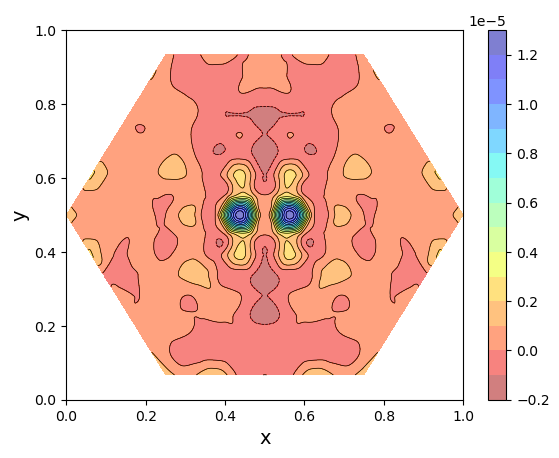

In [35]:
InterpolationPlot2(V , Error , " ", T)
plt.xlabel('x',fontsize=14)
plt.ylabel('y', fontsize=14)

Text(0, 0.5, 'relative error')

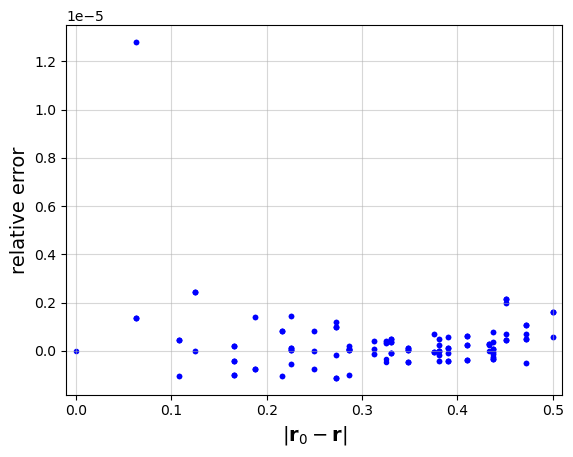

In [36]:
plt.grid(alpha=0.5)
for i in range(0,len(V)):
    r = ((V[i][0]-0.5)**2 + (V[i][1]-0.5)**2)**0.5
    plt.scatter( r , Error[i] , color='b', marker='.')
    
plt.xlim(-0.01,0.51)
plt.xlabel(r'$|\mathbf{r}_0 - \mathbf{r}|$',fontsize=14)
plt.ylabel('relative error', fontsize=14)


Text(0, 0.5, 'error')

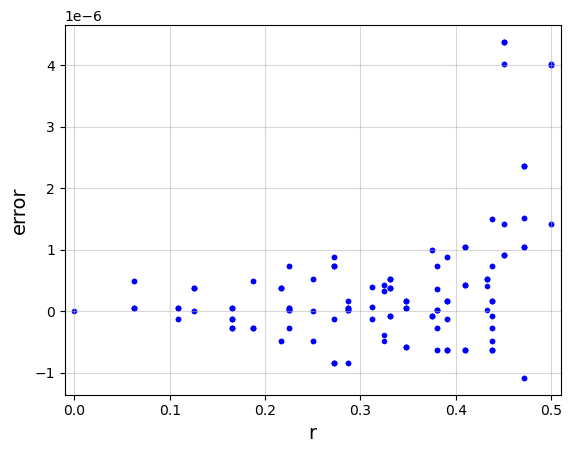

In [37]:
plt.grid(alpha=0.5)
AnaSol = 10.*np.array(xdata)**2
plt.scatter(xdata,ydata-AnaSol,marker='.',color='b')
plt.xlim(-0.01,0.51)
plt.xlabel('r',fontsize=14)
plt.ylabel('error', fontsize=14)